# EDA On Video Game Sales

I got this dataset from Kaggle. Going to perform EDA on the same using the techniques and methods that I learnt from ZeroToPandas course by Jovian.ml

## Downloading the Dataset

We are going to download the dataset using the library opendatasets

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
# Change this
dataset_url = 'https://www.kaggle.com/gregorut/videogamesales'

In [3]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: hemanthkotagiri
Your Kaggle Key: ········


100%|██████████| 381k/381k [00:00<00:00, 55.6MB/s]

The dataset has been downloaded and extracted.

In [4]:
# Change this
data_dir = './videogamesales'

In [5]:
import os
os.listdir(data_dir)

['vgsales.csv']

Let us save and upload our work to Jovian before continuing.

In [6]:
project_name = "video-games-sales-analysis" # change this (use lowercase letters and hyphens only)

In [7]:
!pip install jovian --upgrade -q

In [8]:
import jovian

In [9]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "hemanth-kotagiri/video-games-sales-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/hemanth-kotagiri/video-games-sales-analysis


'https://jovian.ml/hemanth-kotagiri/video-games-sales-analysis'

## Data Preparation and Cleaning

For any Data Science project, the first task is to process the data, look for missing/none values and basically perform data processing and cleaning.


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Loading the data into a data frame

In [11]:
df = pd.read_csv(os.path.join(data_dir, 'vgsales.csv'))

In [12]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


### Exploring the number of rows & columns, ranges of values

In [13]:
df.shape
print(f"The number of rows are: {df.shape[0]} and {df.shape[1]} columns")

The number of rows are: 16598 and 11 columns


In [14]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [15]:
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [16]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

#### Since there are less number of missing value rows, I decieded to drop them.

In [17]:
df.dropna(inplace=True)

In [18]:
df.shape

(16291, 11)

In [19]:
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

#### Converting the year to a date-time value

In [20]:
df.Year = pd.to_datetime(df.Year, format='%Y')

In [21]:
df.Year

0       2006-01-01
1       1985-01-01
2       2008-01-01
3       2009-01-01
4       1996-01-01
           ...    
16593   2002-01-01
16594   2003-01-01
16595   2008-01-01
16596   2010-01-01
16597   2003-01-01
Name: Year, Length: 16291, dtype: datetime64[ns]

In [22]:
import jovian

In [23]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "hemanth-kotagiri/video-games-sales-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/hemanth-kotagiri/video-games-sales-analysis


'https://jovian.ml/hemanth-kotagiri/video-games-sales-analysis'

## Exploratory Analysis and Visualization

It is now time to perform EDA and visualize the dataset using tools such as Matplotlib and Seaborn.

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [24]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

#### Visualizing the highest/most-popular publisher from the data set

In [25]:
df.describe()

,Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [26]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006-01-01,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985-01-01,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008-01-01,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009-01-01,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [27]:
df.set_index("Rank", inplace=True)

In [28]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006-01-01,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985-01-01,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008-01-01,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009-01-01,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16596,Woody Woodpecker in Crazy Castle 5,GBA,2002-01-01,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16597,Men in Black II: Alien Escape,GC,2003-01-01,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16598,SCORE International Baja 1000: The Official Game,PS2,2008-01-01,Racing,Activision,0.00,0.00,0.00,0.00,0.01


In [29]:
df.Publisher.value_counts()

Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
                                ... 
New World Computing                1
Nippon Amuse                       1
FunSoft                            1
Codemasters Online                 1
American Softworks                 1
Name: Publisher, Length: 576, dtype: int64

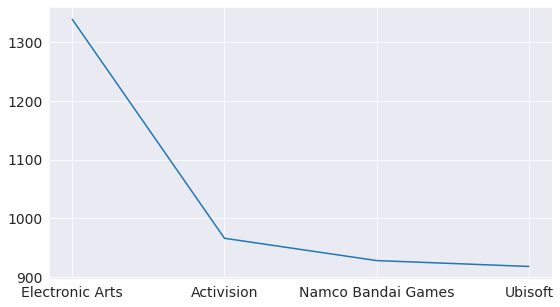

In [39]:
plt.plot(df.Publisher.value_counts().head(4))
plt.show()

#### Visualizing the Global, NA, EU and JP sales of top five gaming products from EA

In [40]:
top_publishers = ["Electronic Arts", "Activison", "Namco Bandai Games", "Ubisoft"]

In [55]:
ea_fltr = df["Publisher"] == "Electronic Arts"
df[ea_fltr]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
78,FIFA 16,PS4,2015-01-01,Sports,Electronic Arts,1.11,6.06,0.06,1.26,8.49
83,FIFA Soccer 13,PS3,2012-01-01,Action,Electronic Arts,1.06,5.05,0.13,2.01,8.24
84,The Sims 3,PC,2009-01-01,Simulation,Electronic Arts,0.98,6.42,0.00,0.71,8.11
93,Star Wars Battlefront (2015),PS4,2015-01-01,Shooter,Electronic Arts,2.93,3.29,0.22,1.23,7.67
100,Battlefield 3,X360,2011-01-01,Shooter,Electronic Arts,4.46,2.13,0.06,0.69,7.34
...,...,...,...,...,...,...,...,...,...,...
16342,Command & Conquer Renegade,PC,2002-01-01,Shooter,Electronic Arts,0.00,0.01,0.00,0.00,0.01
16387,Poker for Dummies,PC,2008-01-01,Misc,Electronic Arts,0.00,0.01,0.00,0.00,0.01
16416,The Godfather (JP sales),X360,2006-01-01,Action,Electronic Arts,0.00,0.00,0.01,0.00,0.01


In [110]:
# Top 5 Games by EA
df[ea_fltr]["Name"].head(5)

Rank
78                          FIFA 16
83                   FIFA Soccer 13
84                       The Sims 3
93     Star Wars Battlefront (2015)
100                   Battlefield 3
Name: Name, dtype: object

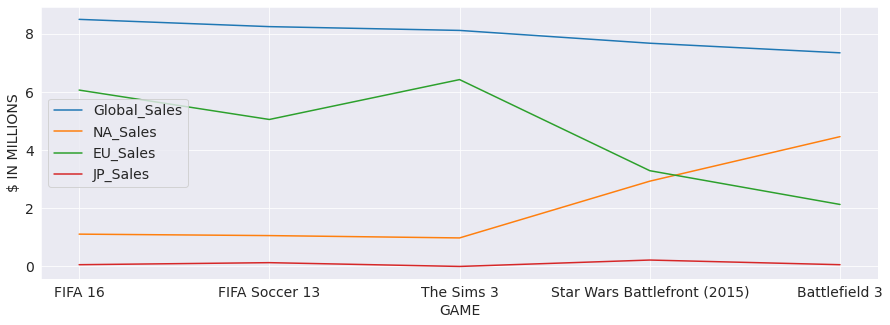

In [112]:
labels = ["Name", "Global_Sales", "NA_Sales", "EU_Sales", "JP_Sales"]
ea_games_sales_df = df[ea_fltr][labels]
plt.figure(figsize=(15,5))
plt.plot(ea_games_sales_df.Name.head(), ea_games_sales_df.Global_Sales.head())
plt.plot(ea_games_sales_df.Name.head(), ea_games_sales_df.NA_Sales.head())
plt.plot(ea_games_sales_df.Name.head(), ea_games_sales_df.EU_Sales.head())
plt.plot(ea_games_sales_df.Name.head(), ea_games_sales_df.JP_Sales.head())
plt.legend(labels[1:])
plt.ylabel("$ IN MILLIONS")
plt.xlabel("GAME")
plt.show()

#### Visualizing the Global, NA, EU, JP sales of Activision

In [115]:
act_fltr = df["Publisher"] == "Activision"
df[act_fltr]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
30,Call of Duty: Modern Warfare 3,X360,2011-01-01,Shooter,Activision,9.03,4.28,0.13,1.32,14.76
32,Call of Duty: Black Ops,X360,2010-01-01,Shooter,Activision,9.67,3.73,0.11,1.13,14.64
34,Call of Duty: Black Ops 3,PS4,2015-01-01,Shooter,Activision,5.77,5.81,0.35,2.31,14.24
35,Call of Duty: Black Ops II,PS3,2012-01-01,Shooter,Activision,4.99,5.88,0.65,2.52,14.03
36,Call of Duty: Black Ops II,X360,2012-01-01,Shooter,Activision,8.25,4.30,0.07,1.12,13.73
...,...,...,...,...,...,...,...,...,...,...
16414,Teenage Mutant Ninja Turtles (3DS),3DS,2013-01-01,Action,Activision,0.01,0.00,0.00,0.00,0.01
16447,Madagascar: Escape 2 Africa,PC,2008-01-01,Action,Activision,0.01,0.00,0.00,0.00,0.01
16504,"Transformers: War for Cybertron (XBox 360, PS3...",PC,2010-01-01,Shooter,Activision,0.01,0.00,0.00,0.00,0.01


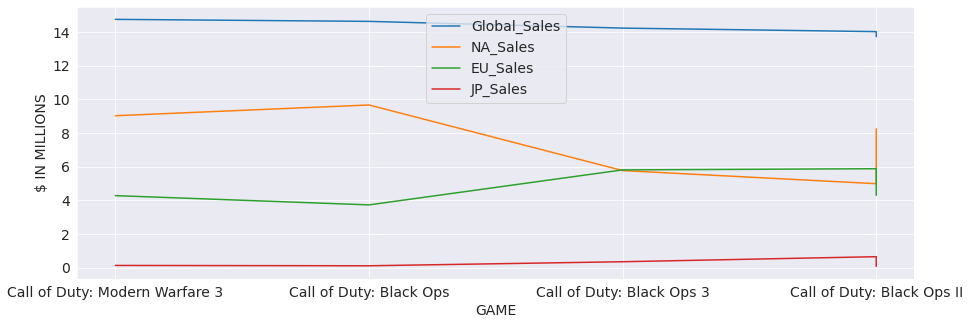

In [118]:
labels = ["Name", "Global_Sales", "NA_Sales", "EU_Sales", "JP_Sales"]
act_df = df[act_fltr][labels]
plt.figure(figsize=(15,5))
plt.plot(act_df.Name.head(), act_df.Global_Sales.head())
plt.plot(act_df.Name.head(), act_df.NA_Sales.head())
plt.plot(act_df.Name.head(), act_df.EU_Sales.head())
plt.plot(act_df.Name.head(), act_df.JP_Sales.head())
plt.legend(labels[1:])
plt.ylabel("$ IN MILLIONS")
plt.xlabel("GAME")
plt.show()

#### Visualizing the top 10 platforms that games are sold

In [158]:
platforms = df.Platform.value_counts()

In [159]:
platforms

DS      2131
PS2     2127
PS3     1304
Wii     1290
X360    1234
PSP     1197
PS      1189
PC       938
XB       803
GBA      786
GC       542
3DS      499
PSV      410
PS4      336
N64      316
SNES     239
XOne     213
SAT      173
WiiU     143
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

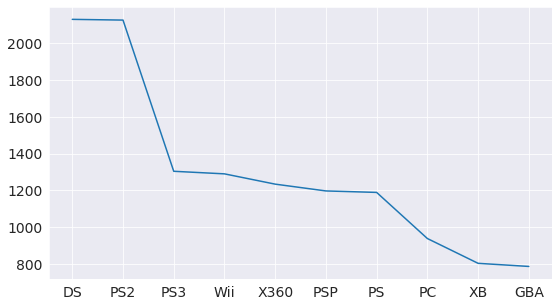

In [162]:
plt.plot(platforms.head(10))
plt.show()

#### Visualizing the most sold games based on genre

In [163]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006-01-01,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985-01-01,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008-01-01,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009-01-01,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16596,Woody Woodpecker in Crazy Castle 5,GBA,2002-01-01,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16597,Men in Black II: Alien Escape,GC,2003-01-01,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16598,SCORE International Baja 1000: The Official Game,PS2,2008-01-01,Racing,Activision,0.00,0.00,0.00,0.00,0.01


In [177]:
genres_df = pd.DataFrame(df.Genre.value_counts())
genres_df

,Genre
Action,3251
Sports,2304
Misc,1686
Role-Playing,1470
Shooter,1282
Adventure,1274
Racing,1225
Platform,875
Simulation,848
Fighting,836


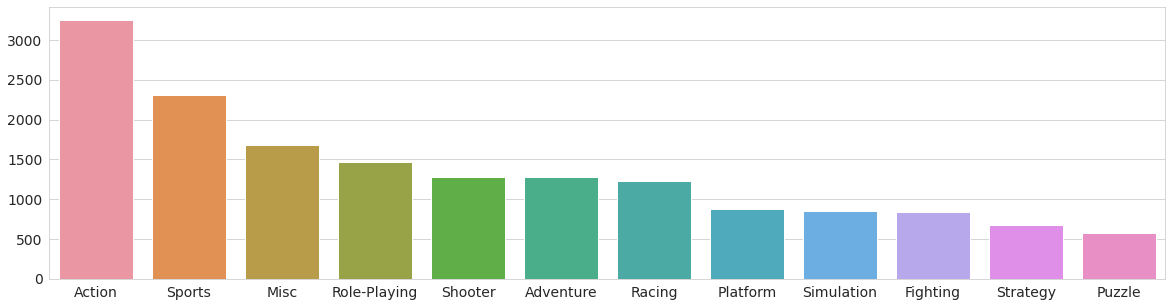

In [191]:
plt.figure(figsize=(20,5))
sns.barplot(genres_df.index, [int(i) for i in genres_df.values])
plt.show()

Let us save and upload our work to Jovian before continuing

In [192]:
import jovian

In [193]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "hemanth-kotagiri/video-games-sales-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/hemanth-kotagiri/video-games-sales-analysis


'https://jovian.ml/hemanth-kotagiri/video-games-sales-analysis'

## Asking and Answering Questions

In the below section, I would ask some pressing questions about how games are sold and what the gamers are interested in the most

#### Q1:- What are those games which still have significant global sale despite the game being released long back

In [238]:
old_games = df[df.sort_values(by=["Year", "Global_Sales"]).Year == "1980-01-01"]

<ipython-input-238-5597c527eaee>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  old_games = df[df.sort_values(by=["Year", "Global_Sales"]).Year == "1980-01-01"]


In [239]:
old_games

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
259,Asteroids,2600,1980-01-01,Shooter,Atari,4.00,0.26,0.0,0.05,4.31
545,Missile Command,2600,1980-01-01,Shooter,Atari,2.56,0.17,0.0,0.03,2.76
1768,Kaboom!,2600,1980-01-01,Misc,Activision,1.07,0.07,0.0,0.01,1.15
1971,Defender,2600,1980-01-01,Misc,Atari,0.99,0.05,0.0,0.01,1.05
2671,Boxing,2600,1980-01-01,Fighting,Activision,0.72,0.04,0.0,0.01,0.77
4027,Ice Hockey,2600,1980-01-01,Sports,Activision,0.46,0.03,0.0,0.01,0.49
5368,Freeway,2600,1980-01-01,Action,Activision,0.32,0.02,0.0,0.00,0.34
6319,Bridge,2600,1980-01-01,Misc,Activision,0.25,0.02,0.0,0.00,0.27
6898,Checkers,2600,1980-01-01,Misc,Atari,0.22,0.01,0.0,0.00,0.24


#### Q2: What are the top selling games in the genre of Sports

In [258]:
fltr = df["Genre"] == "Sports"
top_sports_df = df[fltr].sort_values(by="Global_Sales", ascending=False)
top_sports_df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006-01-01,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
4,Wii Sports Resort,Wii,2009-01-01,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
14,Wii Fit,Wii,2007-01-01,Sports,Nintendo,8.94,8.03,3.60,2.15,22.72
15,Wii Fit Plus,Wii,2009-01-01,Sports,Nintendo,9.09,8.59,2.53,1.79,22.00
78,FIFA 16,PS4,2015-01-01,Sports,Electronic Arts,1.11,6.06,0.06,1.26,8.49
...,...,...,...,...,...,...,...,...,...,...
16182,Sega Golf Club: Miyazato San Kyoudai Naizou,PS3,2006-01-01,Sports,Sega,0.00,0.00,0.01,0.00,0.01
16221,Family Jockey,Wii,2008-01-01,Sports,Namco Bandai Games,0.00,0.00,0.01,0.00,0.01
16229,Victory Spike,PS,1996-01-01,Sports,Imagineer,0.00,0.00,0.01,0.00,0.01


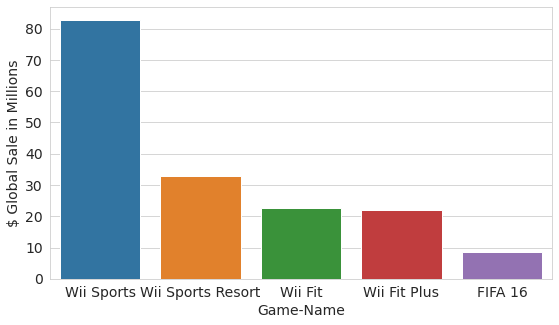

In [261]:
sns.barplot(x=top_sports_df.Name.head(), y=top_sports_df.Global_Sales.head())
plt.xlabel("Game-Name")
plt.ylabel("$ Global Sale in Millions")
plt.show()

#### Q3: Can we generate any correlation among different sales present in the DataFrame?

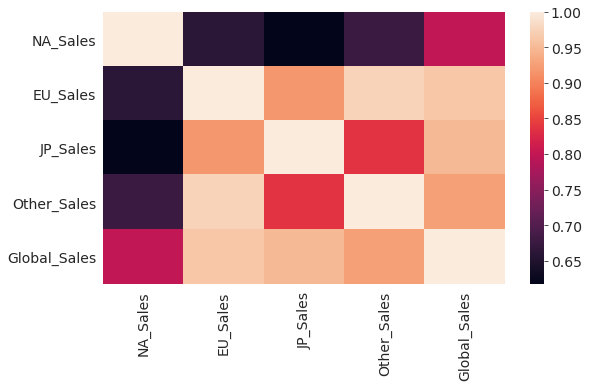

In [274]:
# Grabbing a sample from the dataset
sample_df = df.sample(n=20)
corr = sample_df.corr()
sns.heatmap(corr)
plt.show()

#### Q4: What are the total sales of each Publisher for all the games they published?

In [309]:
sum_sales_df

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Publisher,,,,,
Nintendo,815.75,418.30,454.99,95.19,1784.43
Electronic Arts,584.22,367.38,13.98,127.63,1093.39
Activision,426.01,213.72,6.54,74.79,721.41
Sony Computer Entertainment,265.22,187.55,74.10,80.40,607.28
Ubisoft,252.81,163.03,7.33,50.16,473.54
...,...,...,...,...,...
Naxat Soft,0.00,0.00,0.01,0.00,0.01
Ongakukan,0.00,0.00,0.01,0.00,0.01
Otomate,0.00,0.00,0.01,0.00,0.01


In [335]:
sales = ["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]
sum_sales_df = df.groupby("Publisher")[sales].sum().sort_values(by=sales, ascending=False)

total_sales_series = []

for i in range(576):
    total_sales_series.append(sum_sales_df[sales].iloc[i,:].sum())

sum_sales_df["Total_Sales"] = total_sales_series

In [336]:
sum_sales_df

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Total_Sales
Publisher,,,,,,
Nintendo,815.75,418.30,454.99,95.19,1784.43,3568.66
Electronic Arts,584.22,367.38,13.98,127.63,1093.39,2186.60
Activision,426.01,213.72,6.54,74.79,721.41,1442.47
Sony Computer Entertainment,265.22,187.55,74.10,80.40,607.28,1214.55
Ubisoft,252.81,163.03,7.33,50.16,473.54,946.87
...,...,...,...,...,...,...
Naxat Soft,0.00,0.00,0.01,0.00,0.01,0.02
Ongakukan,0.00,0.00,0.01,0.00,0.01,0.02
Otomate,0.00,0.00,0.01,0.00,0.01,0.02


#### Q5: Which genre is producing more sales ?

In [345]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006-01-01,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985-01-01,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008-01-01,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009-01-01,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16596,Woody Woodpecker in Crazy Castle 5,GBA,2002-01-01,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16597,Men in Black II: Alien Escape,GC,2003-01-01,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16598,SCORE International Baja 1000: The Official Game,PS2,2008-01-01,Racing,Activision,0.00,0.00,0.00,0.00,0.01


In [355]:
genre_sales = df.groupby("Genre")[sales].sum().sort_values(by=sales, ascending=False)
genre_sales

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,
Action,861.77,516.48,158.65,184.92,1722.84
Sports,670.09,371.34,134.76,132.65,1309.24
Shooter,575.16,310.45,38.18,101.90,1026.20
Platform,445.99,200.65,130.65,51.51,829.13
Misc,396.92,211.77,106.67,73.92,789.87
Racing,356.93,236.31,56.61,76.68,726.76
Role-Playing,326.50,187.57,350.29,59.38,923.83
Fighting,220.74,100.00,87.15,36.19,444.05
Simulation,181.78,113.02,63.54,31.36,389.98


In [369]:
total_genre_sales = []
for i in range(12):
    total_genre_sales.append(genre_sales.iloc[i,:].sum())

genre_sales["TOTAL SALES"] = total_genre_sales
genre_total_df = pd.DataFrame(genre_sales["TOTAL SALES"], genre_sales.index)
genre_total_df

,TOTAL SALES
Genre,
Action,244570.86
Sports,185883.68
Shooter,145684.19
Platform,117713.03
Misc,112119.65
Racing,103183.59
Role-Playing,131177.47
Fighting,63057.23
Simulation,55357.28


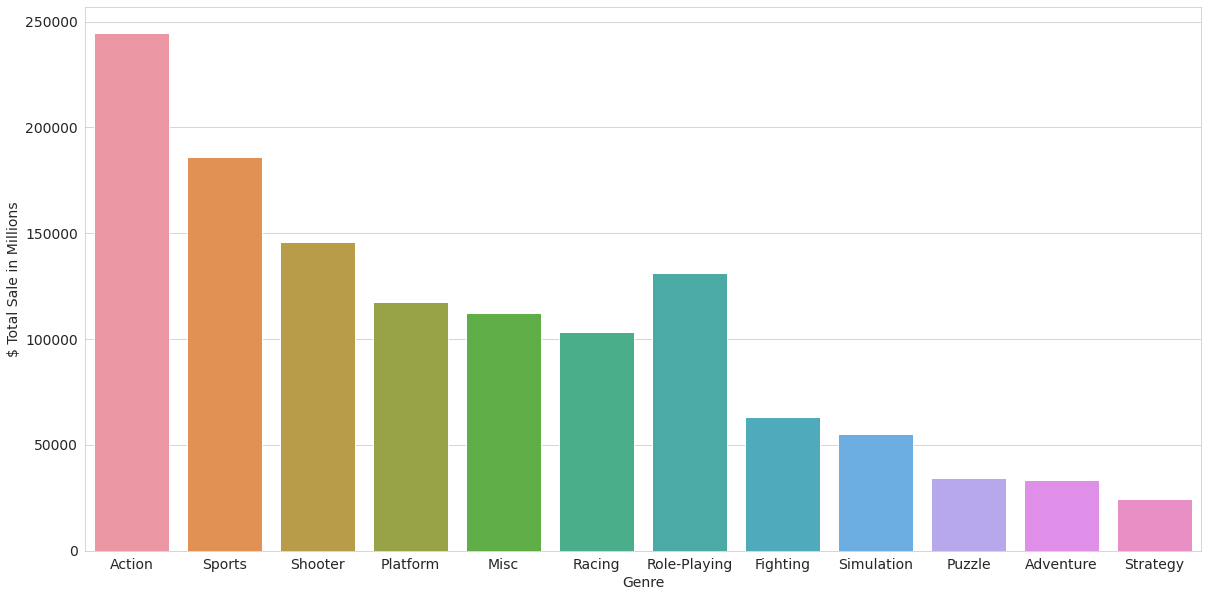

In [375]:
plt.figure(figsize=(20,10))
sns.barplot(x=genre_sales.index, y=genre_sales["TOTAL SALES"])
plt.xlabel("Genre")
plt.ylabel("$ Total Sale in Millions")
plt.show()

Let us save and upload our work to Jovian before continuing.

In [376]:
import jovian

In [377]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "hemanth-kotagiri/video-games-sales-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/hemanth-kotagiri/video-games-sales-analysis


'https://jovian.ml/hemanth-kotagiri/video-games-sales-analysis'

## Inferences and Conclusion

From this EDA of Game Sales, I have concluded that the games released under Action genre are being sold the most, and Strategy being the least. Fixed some of the missing values by dropping the data points and changed the format of the data to a datetime format. We can draw interesting insights from the correlation matrix above of the different sales. Also, we can see that there are a few games which are still very popular though being released way back in the 80's. One of the most used platform was DS by Nintendo. These are some of the basic inferences I can draw from the above. Thank you!

In [378]:
import jovian

In [379]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "hemanth-kotagiri/video-games-sales-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/hemanth-kotagiri/video-games-sales-analysis


'https://jovian.ml/hemanth-kotagiri/video-games-sales-analysis'

## References and Future Work

I think, this data set can be analysed further to draw even more answers for pressing questions. We can add more data to the same.
These resources really helped me a lot in completing this project:
1. [Pandas Documentation](https://pandas.pydata.org/pandas-docs/stable/)
2. [Numpy Documentation](https://numpy.org/doc/)
3. [Seaborn Documentation](https://seaborn.pydata.org/)

In [6]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
